In [1]:
# 1. INPUT PARAMETERS
class SpectraParameters:
    def __init__(self, pixels, poly_order_range, num_peaks_range, snr_range, cosmic_ray_prob, num_spectra):
        self.pixels = pixels
        self.poly_order_range = poly_order_range
        self.num_peaks_range = num_peaks_range
        self.snr_range = snr_range
        self.cosmic_ray_prob = cosmic_ray_prob
        self.num_spectra = num_spectra

# Define parameter ranges
poly_order_range = (3, 10)
num_peaks_range = (2, 5)
snr_range = (10, 100)
cosmic_ray_prob = 0.1
num_spectra = 50

# Create instance of SpectraParameters
spectra_params = SpectraParameters(
    pixels=1024,
    poly_order_range=poly_order_range,
    num_peaks_range=num_peaks_range,
    snr_range=snr_range,
    cosmic_ray_prob=cosmic_ray_prob,
    num_spectra=num_spectra
)

# Access & print parameter values
print("Number of pixels:", spectra_params.pixels)
print("Polynomial order range:", spectra_params.poly_order_range)
print("Number of peaks range:", spectra_params.num_peaks_range)
print("SNR range:", spectra_params.snr_range)
print("Cosmic ray probability:", spectra_params.cosmic_ray_prob)
print("Number of spectra:", spectra_params.num_spectra)

Number of pixels: 1024
Polynomial order range: (3, 10)
Number of peaks range: (2, 5)
SNR range: (10, 100)
Cosmic ray probability: 0.1
Number of spectra: 50


Number of peaks: 3
SNR: 31.251996116175576


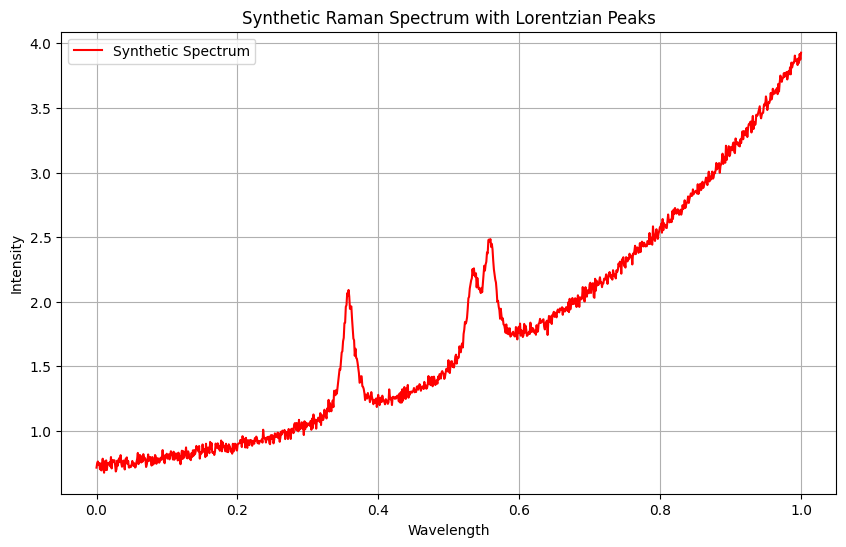

In [2]:
# 2. PEAK CHARACTERISTICS
# Create Lorentzian peaks (specifications)
class SpectraParameters:
    def __init__(self, pixels, poly_order_range, num_peaks_range, snr_range, cosmic_ray_prob, num_spectra):
        self.pixels = pixels
        self.poly_order_range = poly_order_range
        self.num_peaks_range = num_peaks_range
        self.snr_range = snr_range
        self.cosmic_ray_prob = cosmic_ray_prob
        self.num_spectra = num_spectra

# Define parameter ranges
poly_order_range = (3, 10)
num_peaks_range = (2, 5)
snr_range = (10, 100)
cosmic_ray_prob = 0.1
num_spectra = 50

# Create an instance of SpectraParameters
spectra_params = SpectraParameters(
    pixels=1024,
    poly_order_range=poly_order_range,
    num_peaks_range=num_peaks_range,
    snr_range=snr_range,
    cosmic_ray_prob=cosmic_ray_prob,
    num_spectra=num_spectra
)

import numpy as np
import matplotlib.pyplot as plt

class SyntheticRamanSpectrum:
    def __init__(self, pixels, poly_order, num_peaks, snr):
        self.pixels = pixels
        self.poly_order = poly_order
        self.num_peaks = num_peaks
        self.snr = snr
        self.wavelengths = np.linspace(0, 1, self.pixels)
        self.spectrum = self.generate_spectrum()

    def generate_spectrum(self):
        # Generate baseline using a polynomial
        baseline = np.polyval(np.random.rand(self.poly_order + 1), self.wavelengths)

        # Generate Lorentzian peaks
        peaks = np.zeros_like(self.wavelengths)
        for _ in range(self.num_peaks):
            peak_amplitude = np.random.uniform(0, 1)
            peak_position = np.random.uniform(0.2, 0.8)
            peak_width = 1 / (self.pixels * 0.1)  # Adjust as needed based on the number of pixels
            peaks += peak_amplitude * (peak_width ** 2) / ((self.wavelengths - peak_position) ** 2 + peak_width ** 2)

        # Add noise based on SNR
        noise = np.random.normal(0, np.max(peaks) / self.snr, self.pixels)
        
        # Combine baseline, peaks, & noise
        spectrum = baseline + peaks + noise
        return spectrum

# Parameters for generating synthetic spectra
pixels = 1024
poly_order = 4
num_peaks_range = (2, 5)
snr_range = (10, 100)

# Randomly generate parameters
num_peaks = np.random.randint(num_peaks_range[0], num_peaks_range[1] + 1)
snr = np.random.uniform(snr_range[0], snr_range[1])

# Create synthetic spectrum
synthetic_spectrum = SyntheticRamanSpectrum(pixels, poly_order, num_peaks, snr)

# Print information
print("Number of peaks:", synthetic_spectrum.num_peaks)
print("SNR:", synthetic_spectrum.snr)

# Plot Lorentzian peaks
plt.figure(figsize=(10, 6))
plt.plot(synthetic_spectrum.wavelengths, synthetic_spectrum.spectrum, color= 'red', label='Synthetic Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Synthetic Raman Spectrum with Lorentzian Peaks')
plt.legend()
plt.grid(True)
plt.show()

Original Signal: [1. 2. 3. 4. 5.]
Noisy Signal: [0.84456508 1.89364262 3.09919425 3.77106079 5.55117957]


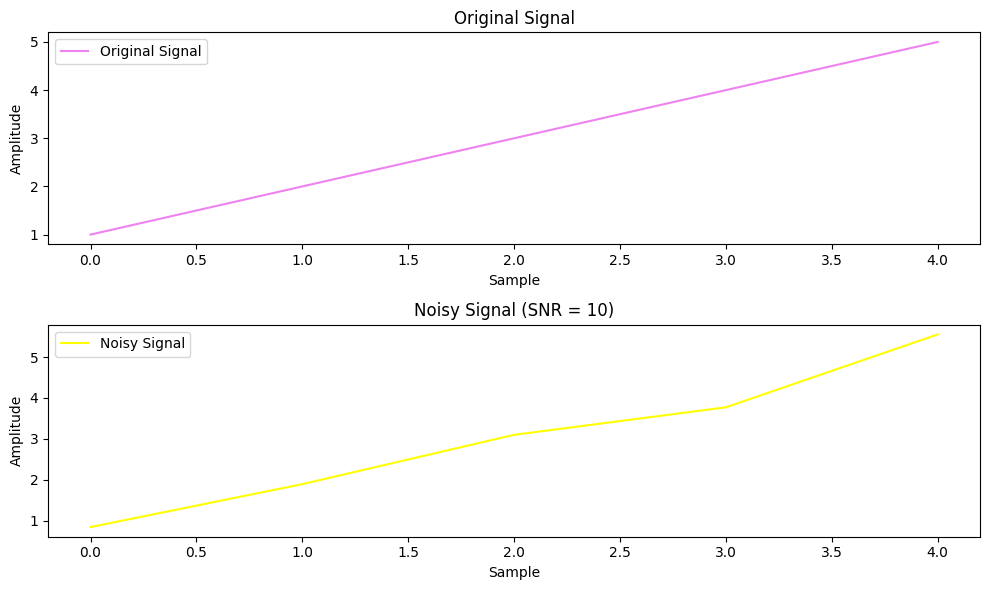

In [3]:
# 3. NOISE GENERATION
# Add Noise (specifications)
import numpy as np
import matplotlib.pyplot as plt

# Noise follows normal distribution (mean and standard deviation (M & SD)) 
# snr=signal-to-noise ratio, nar = noise amplitude range
def add_gaussian_noise(signal, snr, noise_amplitude_range=(0.1, 0.5)):

    # Calculate signal power
    signal_power = np.mean(np.abs(signal) ** 2)
    
    # Calculate noise power based on SNR
    noise_power = signal_power / snr
    
    # Calculate standard deviation of the noise
    noise_std = np.sqrt(noise_power)
    
    # Generate random noise amplitudes within the specified range
    min_amp, max_amp = noise_amplitude_range
    noise_amplitudes = np.random.uniform(min_amp, max_amp, len(signal))
    
    # Generate Gaussian noise samples
    noise = np.random.normal(0, noise_amplitudes * noise_std, len(signal))
    
    # Add noise to signal
    noisy_signal = signal + noise
    
    return noisy_signal

# Example
original_signal = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
snr = 10
noisy_signal = add_gaussian_noise(original_signal, snr)

print("Original Signal:", original_signal)
print("Noisy Signal:", noisy_signal)

# Plot original & noisy signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(original_signal, label='Original Signal', color='violet')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(noisy_signal, label='Noisy Signal', color='yellow')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Noisy Signal (SNR = {})'.format(snr))
plt.legend()

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


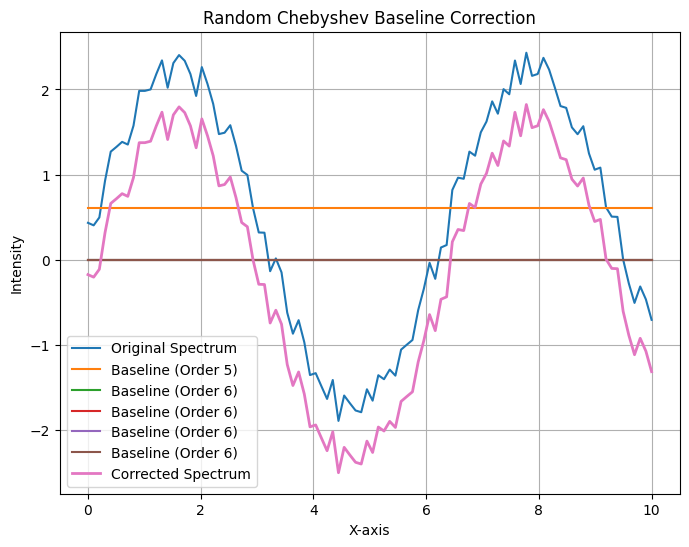

In [4]:
# 4. BASELINE VARIATION
# Baseline variation (iteration) & Polynomial order (random)
# Chebyshev polynomial baseline
import numpy as np
from scipy.optimize import curve_fit
import random
import matplotlib.pyplot as plt

def chebyshev_polynomial(x, *coeffs):
    """
    Chebyshev polynomial function for baseline correction
    
    Args:
        x (array-like): Input x-values
        *coeffs: Coefficients of the Chebyshev polynomial

    Returns:
        array-like: Predicted baseline values
    """
    n = len(coeffs)
    chebyshev_terms = [coeffs[i] * np.polynomial.chebyshev.chebval(x, (i+1)) for i in range(n)]
    baseline = np.sum(chebyshev_terms, axis=0)
    return baseline

# Sample spectra data (x & y values)
x = np.linspace(0, 10, 100)
y = 2 * np.sin(x) + 0.5 * np.random.rand(len(x))

# Specify range for randomly selecting order of Chebyshev polynomial 
min_order = 2
max_order = 6

# Number of iterations (baseline segments)
num_iterations = 5

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original Spectrum')

for _ in range(num_iterations):
    # Randomly select polynomial order (for iteration)
    order = random.randint(min_order, max_order)

    # Initial guess for Chebyshev polynomial coefficients (randomly initialized)
    initial_guess = [random.uniform(-1, 1) for _ in range(order)]

    # Fit Chebyshev polynomial to data (for iteration)
    popt, _ = curve_fit(chebyshev_polynomial, x, y, p0=initial_guess)

    # Generate baseline using fitted coefficients
    baseline = chebyshev_polynomial(x, *popt)

    # Correct original spectrum by subtracting baseline (for iteration)
    y -= baseline

    # Plot baseline (for this iteration)
    plt.plot(x, baseline, label=f'Baseline (Order {order})')

# Plot original spectrum, baseline & corrected spectrum
plt.plot(x, y, label='Corrected Spectrum', linewidth=2)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Intensity')
plt.title('Random Chebyshev Baseline Correction')
plt.grid(True)
plt.show()

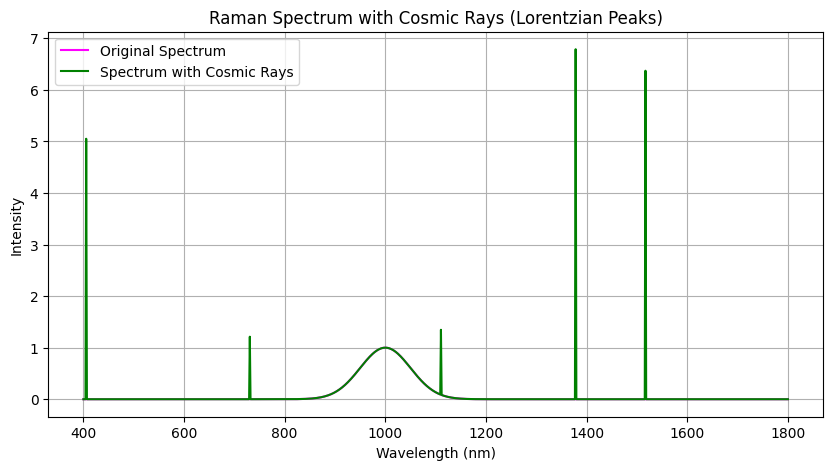

In [5]:
# 5. COSMIC RAYS
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def add_cosmic_rays(spectrum, num_cosmic_rays):
    """
    Add cosmic rays to a Raman spectrum as Lorentzian peaks with a width parameter of zero

    Args:
        spectrum (numpy.ndarray): The original Raman spectrum
        num_cosmic_rays (int): The number of cosmic rays to add

    Returns:
        numpy.ndarray: The Raman spectrum with added cosmic rays
    """
    spectrum_with_cosmic_rays = spectrum.copy()
    
    # Calculate L2-norm of complete signal
    l2_norm = np.linalg.norm(spectrum)
    
    for _ in range(num_cosmic_rays):
        # Generate random amplitude between 0.8 & l2_norm
        cosmic_ray_amplitude = np.random.uniform(0.8, l2_norm)
        
        # Randomly select position for cosmic ray
        position = np.random.randint(0, len(spectrum))
        
        # Add cosmic ray as Lorentzian peak with width zero
        spectrum_with_cosmic_rays[position] += cosmic_ray_amplitude

    return spectrum_with_cosmic_rays

# Generate synthetic spectrum
wavelengths = np.linspace(400, 1800, 1000)
original_spectrum = np.exp(-(wavelengths - 1000)**2 / (2 * 50**2))

# Add cosmic rays
num_cosmic_rays = 5
spectrum_with_cosmic_rays = add_cosmic_rays(original_spectrum, num_cosmic_rays)

# Plot original & modified spectra
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, original_spectrum, label='Original Spectrum', color='magenta')
plt.plot(wavelengths, spectrum_with_cosmic_rays, label='Spectrum with Cosmic Rays', color='green')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.title('Raman Spectrum with Cosmic Rays (Lorentzian Peaks)')
plt.grid()
plt.show()